In [1]:
from google.colab import files
files.upload()

Saving peppers.png to peppers.png
Saving 2cv.jpg to 2cv.jpg


{'peppers.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x00\x00\x00\x01\x80\x08\x02\x00\x00\x00TBM\xe8\x00\x00\x00\x07tIME\x07\xd2\x07\x10\x10.)$\x88\xae;\x00\x00\x00\'tEXtCopyright\x00Copyright The MathWorks, Inc.\x91\x81\xd0~\x00\x00\x00\x19tEXtDescription\x00Zesty peppers7\x15\x82o\x00\x00 \x00IDATx\x9cD\xbc\xcd\x92dM\x8e\\yTa\xd7\xf3\xab\x1e\x91&{=du\xb3\x1fdd\xde\xff}\xc8\xaeL7@g\x81\x1b5\xbb\x90\x94\x8cp\xf7\xebf\xf8Q=\x80\xfe\x9f\xff\xf9\xff\xcaP\xf8^u\xfa\xd4\x80\x13\x18)\xa4\x9a>L\\\x1d\x14\t\xdb\x86Nw\x93R\x14Gex\xf4\\k\xb8q\xa6\xf9\xc4\x1c\xfb\x06FvT\x93|\x8e\x81\x1b@R\x134\xb6tChi:\xc3\x18\xc9G$\x9d\x16\xa298E\xc842eM"\x97"fpbw\xd0\xf7\x9b\xd1\xef\xa1\xf9\x93;\xdf\xee\xaf\xfe\x04\x7f\xfc\x94\x1a\x8e\xec*_7s+\x11e\x1d\xc2\x04e\xc6\x94NI\x87\xa7\xeaIE\x99}\x1c\x9e\x93\xdcVIQ\xbaok\xfeH\x1a\x97\xa2vE2W\xb9\xe8\x13\x9d\xee!9\x12d\x92\x14\xa2\xe6\xdeR[\xe7OT\x08E\x81I\x93T\x0e\xaa(hN=\x88\xd47\xa3\xf9ZpN\xa0\x18\x12[\xfb\x1bD#\xbb,\x9a\x11~:\xb7R\x8eFw\x84t<c\x1d\x814\

In [31]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

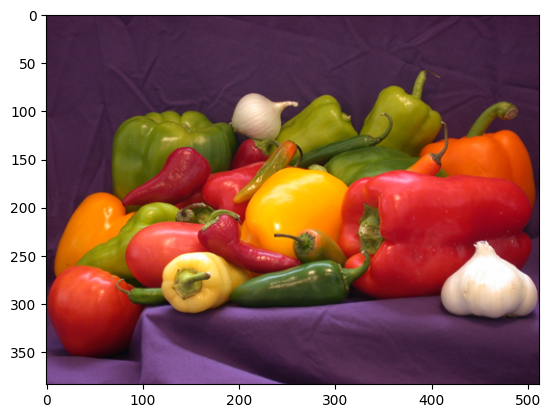

In [32]:
img = plt.imread('peppers.png')
plt.imshow(img)
plt.show()

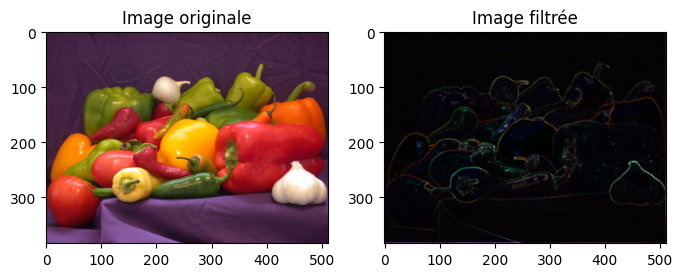

In [53]:
masque = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
r = img[:,:,0]
v = img[:,:,1]
b = img[:,:,2]
rmasque = sig.convolve2d(r, masque, mode='same')
vmasque = sig.convolve2d(v, masque, mode='same')
bmasque= sig.convolve2d(b, masque, mode='same')
#combiner les tableaux filtres
imgfiltre = np.dstack((rmasque, vmasque, bmasque))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
axes[0].imshow(img)
axes[0].set_title('Image originale')
axes[1].imshow(np.abs(imgfiltre))
axes[1].set_title('Image filtrée')
plt.show()

Text(0.5, 1.0, 'Image rehaussée')

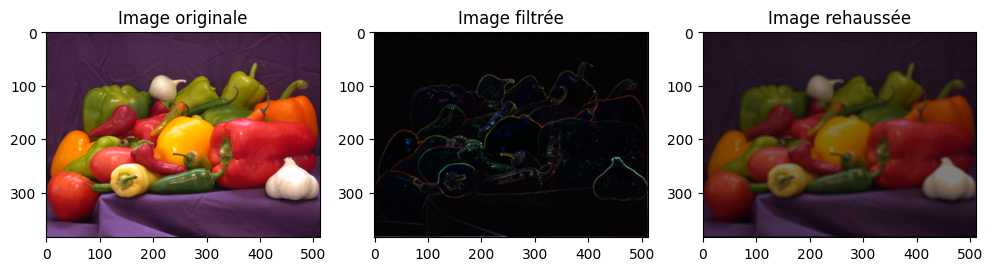

In [54]:
#pour avoir l'image rehaussee il faut faire la somme ponderee des deux images
alpha = 0.5
imgrehaussee = alpha * img + (1 - alpha) * imgfiltre
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
axes[0].imshow(img)
axes[0].set_title('Image originale')
axes[1].imshow(np.abs(imgfiltre))
axes[1].set_title('Image filtrée')
axes[2].imshow(imgrehaussee)
axes[2].set_title('Image rehaussée')

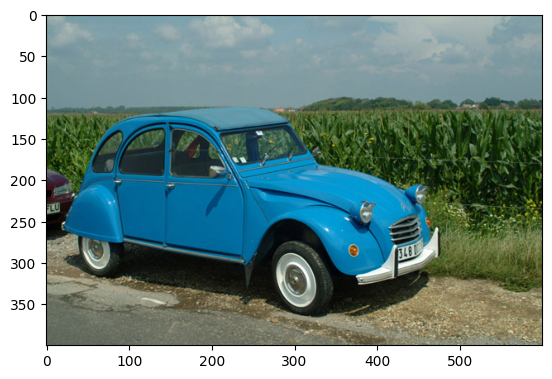

In [35]:
img2 = plt.imread('2cv.jpg')
plt.imshow(img2)
plt.show()

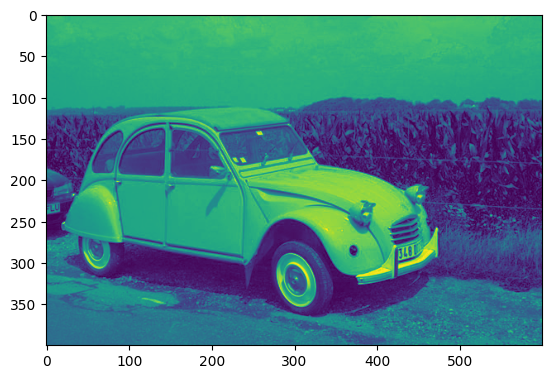

In [36]:
r = img2[:, :, 0]
v = img2[:, :, 1]
b = img2[:, :, 2]
imgbleu = np.zeros_like(b)
imgbleu[:, :] = b[:, :]
plt.imshow(imgbleu)
plt.show()

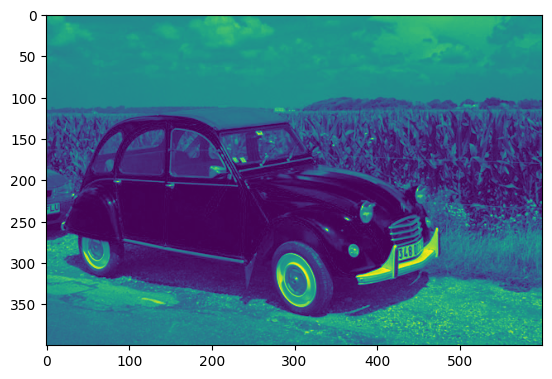

In [37]:
imgrouge = np.zeros_like(r)
imgrouge[:, :] = r[:, :]
plt.imshow(imgrouge)
plt.show()

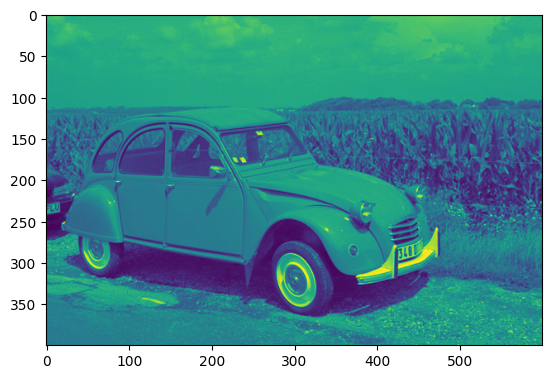

In [38]:
imgvert = np.zeros_like(b)
imgvert[:, :] = v[:, :]
plt.imshow(imgvert)
plt.show()

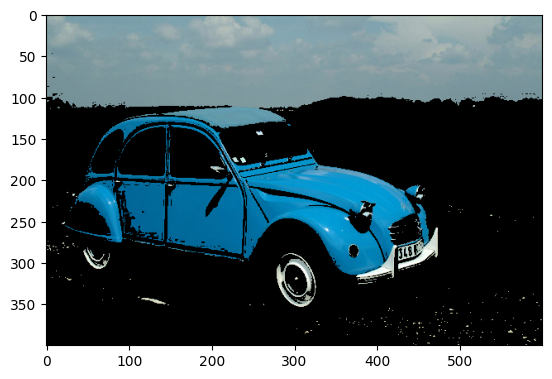

In [41]:
dimensions=np.shape(img2)
seuil = 150
masque = (img2[:,:,2]> seuil)
imgf = np.zeros(dimensions,dtype=np.uint8)
imgf[masque,0] = img2[masque,0]
imgf[masque,1] = img2[masque,1]
imgf[masque,2] = img2[masque,2]
plt.imshow(imgf)
plt.show()

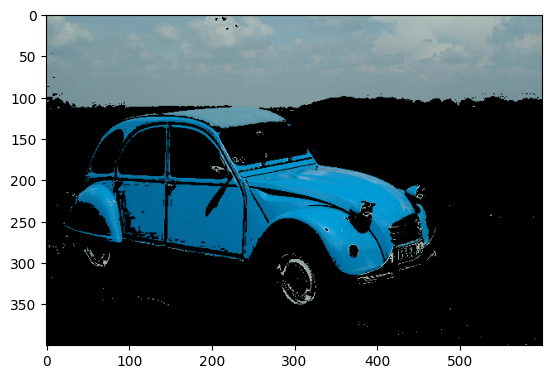

In [51]:
seuil = 180
masque = (img2[:,:,0] < seuil) & (img2[:,:,2] > 150)
imgf = np.zeros_like(img)
imgf2 = np.zeros_like(img2)
imgf2[masque,:] = img2[masque,:]
plt.imshow(imgf2)
plt.show()

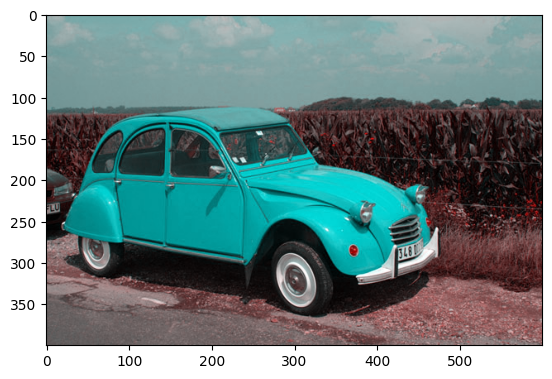

In [52]:
imgvb = np.copy(img2)
imgvb[:,:,1], imgvb[:,:,2] = imgvb[:,:,2], imgvb[:,:,1]

# Afficher l'image transformée
plt.imshow(imgvb)
plt.show()